# Step 1: Setting Up the Environment

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# Step 2: Load and apply data augmentation

In [94]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

train_root = MNIST(root='./data',download=True,train=True,transform=transform)
test_root = MNIST(root='./data',download=True,train=False,transform=transform)

train = DataLoader(train_root,batch_size=1024,shuffle=True) #batch size 1024 to make the training fast
test = DataLoader(test_root,batch_size=1024,shuffle=False)

# Step 3: Build a simple CNN

In [95]:
class CNN(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(in_channels=1,out_channels=12,kernel_size=3,padding=1)
      self.conv2 = nn.Conv2d(in_channels=12,out_channels=24,kernel_size=3,padding=1)
      self.conv3 = nn.Conv2d(in_channels=24,out_channels=36,kernel_size=3,padding=1)
      self.fc1 = nn.Linear(36 * 3 * 3, 48)
      self.fc2 = nn.Linear(48, 10)
      self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2)
      self.relu = nn.ReLU()

    def forward(self,x):
      x = self.maxpool(self.relu(self.conv1(x)))
      x = self.maxpool(self.relu(self.conv2(x)))
      x = self.maxpool(self.relu(self.conv3(x)))
      x = torch.flatten(x,start_dim=1)
      x = self.relu(self.fc1(x))
      x = self.fc2(x)
      return x

model = CNN()

# Step 4: Get the optimizer and CrossEntropyLoss to update the params

In [96]:
criterion = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(),lr=0.01)

# Step 5: Train the network

In [97]:
def training(epo=5):
  for e in range(epo):
    run_loss = 0
    for img,label in train:
      opt.zero_grad()
      output = model(img)
      loss = criterion(output,label)
      loss.backward()
      opt.step()
      run_loss += loss
    print(f"epo: {e+1} --- loss: {run_loss/len(train):.2f}")

In [98]:
training()

epo: 1 --- loss: 0.99
epo: 2 --- loss: 0.31
epo: 3 --- loss: 0.22
epo: 4 --- loss: 0.18
epo: 5 --- loss: 0.15


# Step 6: Validation Loop

In [99]:
def eval_model():
    val_loss = 0
    with torch.no_grad():
        for img,label in test:
            output = model(img)
            loss = criterion(output, label)
            val_loss += loss.item()
        print(f"Validation Loss {val_loss/len(test):0.2f}")

In [100]:
eval_model()

Validation Loss 0.13


# Step 7: plot the result

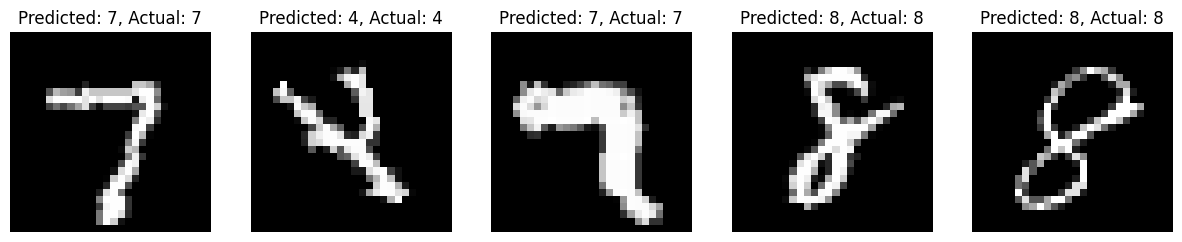

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    with torch.no_grad():
        for i, (img, label) in enumerate(test):
            if i >= num_images:
                break
            output = model(img[0].unsqueeze(0))
            predicted_class = torch.argmax(output).item()

            image = img[0].squeeze().numpy()
            axes[i].imshow(image, cmap='gray')
            axes[i].axis('off')
            axes[i].set_title(f"Predicted: {predicted_class}, Actual: {label[0].item()}")
    plt.show()

plot_predictions(5)
